<a href="https://colab.research.google.com/github/niha21ah/ml-project/blob/mathias/ML_SVR_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
per = pd.read_csv('WEC_Perth_49.csv')


---
# 1. EDA and Feature Engineering



Content:


*   Discuss Class imbalance
*   Scale
*   Plot




In [ ]:
per.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [ ]:
#summing all PowerXX columns:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 65.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np




In [ ]:
features = []
for col in per.columns:
  if col[0]=='X' or col[0]=='Y':
    features.append(col)

features

['X1',
 'Y1',
 'X2',
 'Y2',
 'X3',
 'Y3',
 'X4',
 'Y4',
 'X5',
 'Y5',
 'X6',
 'Y6',
 'X7',
 'Y7',
 'X8',
 'Y8',
 'X9',
 'Y9',
 'X10',
 'Y10',
 'X11',
 'Y11',
 'X12',
 'Y12',
 'X13',
 'Y13',
 'X14',
 'Y14',
 'X15',
 'Y15',
 'X16',
 'Y16',
 'X17',
 'Y17',
 'X18',
 'Y18',
 'X19',
 'Y19',
 'X20',
 'Y20',
 'X21',
 'Y21',
 'X22',
 'Y22',
 'X23',
 'Y23',
 'X24',
 'Y24',
 'X25',
 'Y25',
 'X26',
 'Y26',
 'X27',
 'Y27',
 'X28',
 'Y28',
 'X29',
 'Y29',
 'X30',
 'Y30',
 'X31',
 'Y31',
 'X32',
 'Y32',
 'X33',
 'Y33',
 'X34',
 'Y34',
 'X35',
 'Y35',
 'X36',
 'Y36',
 'X37',
 'Y37',
 'X38',
 'Y38',
 'X39',
 'Y39',
 'X40',
 'Y40',
 'X41',
 'Y41',
 'X42',
 'Y42',
 'X43',
 'Y43',
 'X44',
 'Y44',
 'X45',
 'Y45',
 'X46',
 'Y46',
 'X47',
 'Y47',
 'X48',
 'Y48',
 'X49',
 'Y49']

<h1>Support Vector Regressor (baseline model)</h1>

The research paper 'Hybrid machine learning models for predicting short-term wave energy flux' uses SVM + Multi-Objective Optimization (MOGWO). As there’s no plug-and-play MOGWO in sklearn and this is out of the scope of the course, we use GridSearchCV as a practical alternative for our baseline model.

In [ ]:
target = 'Total_Power'
# def scale_columns(df, cols):
#     scaler = StandardScaler()
#     scaled = df.copy()
#     scaled[cols] = scaler.fit_transform(scaled[cols])
#     return scaled, scaler
# per_scaled, scaler = scale_columns(per, features+[target])
# per_scaled

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

X_scaled = feature_scaler.fit_transform(per[features])
y_scaled = target_scaler.fit_transform(per[[target]])


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train.ravel())
y_pred = svr.predict(X_test)


In [ ]:
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

r2 = r2_score(y_test_rescaled, y_pred_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_pred_rescaled)

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9686733103605146
RMSE: 21487.2500500924


The R-squared tells us that 96.87% of the variance in the target variable (Total_Power) is explained by the features (X1–X49, Y1–Y49). The RMSE illustrates that on average, our model's predictions are off by ~21,487 Watts.

In [ ]:
parameters = svr.get_params().keys()
parameters

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [ ]:
params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}
# grid = GridSearchCV(SVR(), params, cv=3, scoring='neg_mean_squared_error')
grid = GridSearchCV(SVR(), params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


grid.fit(X_train, y_train.ravel())
best_svr = grid.best_estimator_

In [ ]:
best_svr.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.01,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The hyperparameter C is now set to 10 instead of 1.0 as in the initial model. Regularization parameter (higher C-> less reguralized). The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2. For an intuitive visualization of the effects of scaling the regularization parameter C, see Scaling the regularization parameter for SVCs.

In [ ]:
y_best_pred = best_svr.predict(X_test)
y_best_pred_rescaled = target_scaler.inverse_transform(y_best_pred.reshape(-1, 1))
r2 = r2_score(y_test_rescaled, y_best_pred_rescaled)
rmse = root_mean_squared_error(y_test_rescaled, y_best_pred_rescaled)
print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9735227079971863
RMSE: 19754.241922573256


In [ ]:
scores = cross_val_score(best_svr, X_train, y_train.ravel(), cv=3, scoring='neg_mean_squared_error')

Scores: [-0.03083303 -0.03046333 -0.03207079]
mean: 0.031122385493905252
std dev: 0.0006874001116884256


In [ ]:
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std dev RMSE:", rmse_scores.std())

RMSE scores: [0.17559336 0.17453749 0.17908321]
Mean RMSE: 0.17640468372925758
Std dev RMSE: 0.001942434628466109


In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train_cv, X_val_cv = X_scaled[train_index], X_scaled[val_index]
    y_train_cv, y_val_cv = y_scaled[train_index], y_scaled[val_index]

    svr = SVR(kernel='rbf', C=10, epsilon=0.1)
    svr.fit(X_train_cv, y_train_cv.ravel())

    y_pred_cv = svr.predict(X_val_cv).reshape(-1, 1)

    # Inverse transform predictions and actuals to original scale
    y_pred_inv = target_scaler.inverse_transform(y_pred_cv)
    y_val_inv = target_scaler.inverse_transform(y_val_cv)

    rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
    rmse_scores.append(rmse)

# Final metrics
print("Cross-validated RMSE (Watts) for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Std dev RMSE:", np.std(rmse_scores))


Cross-validated RMSE (Watts) for each fold: [np.float64(21573.149544935033), np.float64(21253.757461199635), np.float64(21928.474455099986)]
Mean RMSE: 21585.12715374489
Std dev RMSE: 275.5822355173168


The mean RMSE from the cross validation is equal to 21585 watts, which is significantly higher than what we got from the train test split. However the optimized SVR still outperforms the first SVR model.

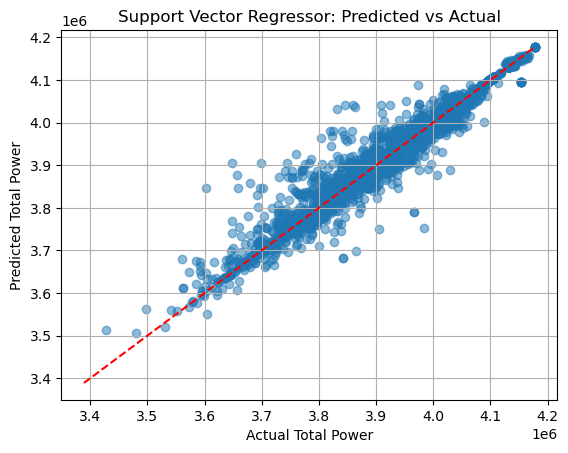

In [ ]:
def scatter_true_pred(target, y_test, y_pred, ml_model_name):
    y = per[[target]]
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Total Power")
    plt.ylabel("Predicted Total Power")
    plt.title(f"{ml_model_name}: Predicted vs Actual")
    plt.grid(True)
    plt.show()
scatter_true_pred('Total_Power', y_test_rescaled, y_best_pred_rescaled, 'Support Vector Regressor')

From this plot and the histogram underneath, we see that the predicted power from the SVR is close to the actual power, especially in area around the mean of the actual total power and it seemes that the model misses more on the left fail of the distribution - the lower side of the mean, where it often overpredicts.

<Axes: xlabel='Total_Power', ylabel='Count'>

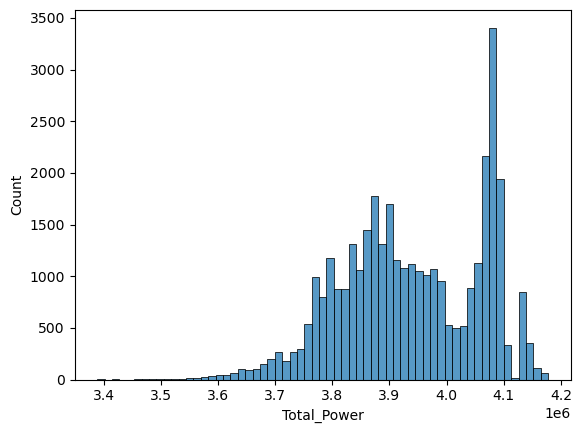

In [ ]:
sns.histplot(data=per, x='Total_Power')

In [ ]:
per.Total_Power.mean()

np.float64(3938246.455667397)

In [ ]:
!pip install seaborn

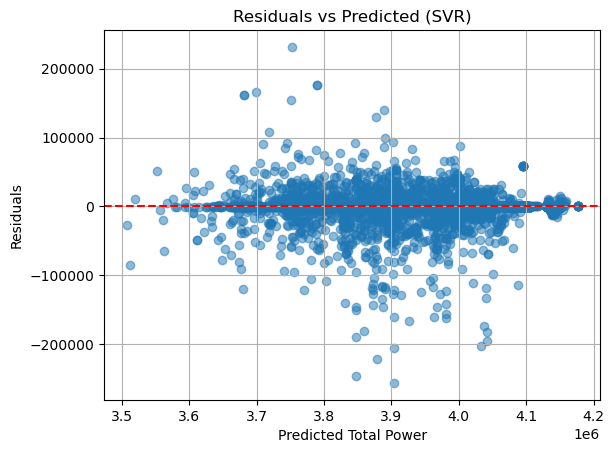

In [ ]:
import seaborn as sns

residuals = y_test_rescaled.flatten() - y_best_pred_rescaled.flatten()
plt.scatter(y_best_pred_rescaled, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Total Power")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (SVR)")
plt.grid(True)
plt.show()


The residuals are more spread out on the left side of the mean total predicted power

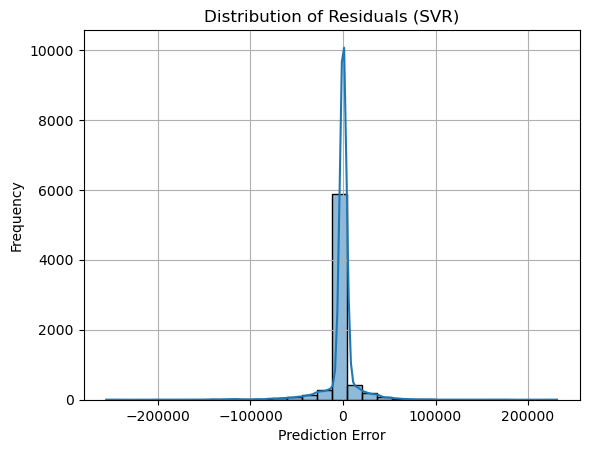

In [ ]:
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals (SVR)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
feature_x = 'X1'
feature_y = 'Y1'
x_range = np.linspace(per[feature_x].min(), per[feature_x].max(), 50)
y_range = np.linspace(per[feature_y].min(), per[feature_y].max(), 50)
xx, yy = np.meshgrid(x_range, y_range)

# # Prepare input for prediction
grid = pd.DataFrame({feature_x: xx.ravel(), feature_y: yy.ravel()})

# Fill missing features with mean values
for col in features:
    if col not in grid.columns:
        grid[col] = per[col].mean()

# Scale features using your feature scaler
grid_scaled = feature_scaler.transform(grid[features])
predicted = best_svr.predict(grid_scaled)
predicted = predicted.reshape(xx.shape) #is scaled



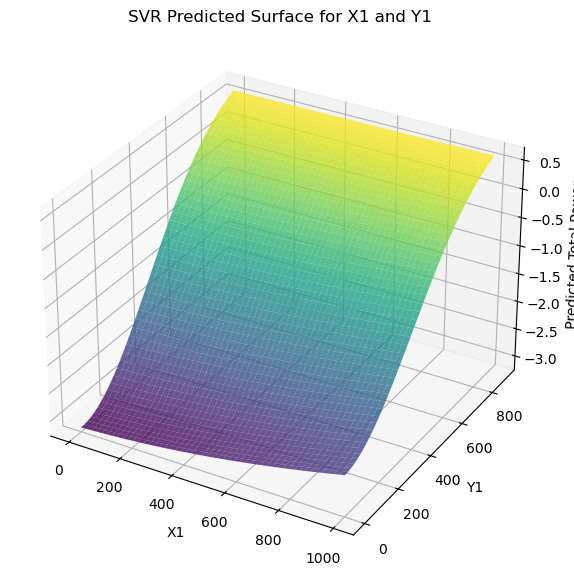

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, predicted, cmap='viridis', alpha=0.8)
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel('Predicted Total Power')
ax.set_title('SVR Predicted Surface for X1 and Y1')
plt.show()


<h1>3-D plots for EDA</h1>

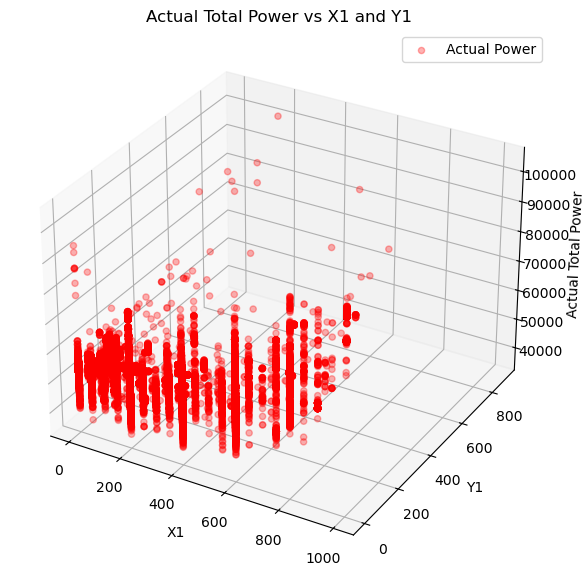

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot real power production
ax.scatter(per[feature_x], per[feature_y], per['Power1'], c='red', alpha=0.3, label='Actual Power')

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel('Actual Total Power')
ax.set_title('Actual Total Power vs X1 and Y1')
ax.legend()
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def tree_d_scatter(df, feature_x, feature_y, target):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot real power production
    ax.scatter(per[feature_x], per[feature_y], per[target], c='red', alpha=0.2, label='Actual Power')

    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel('Actual Total Power')
    ax.set_title(f'Actual Total Power vs {feature_x} and {feature_y}')
    ax.legend()
    plt.show()


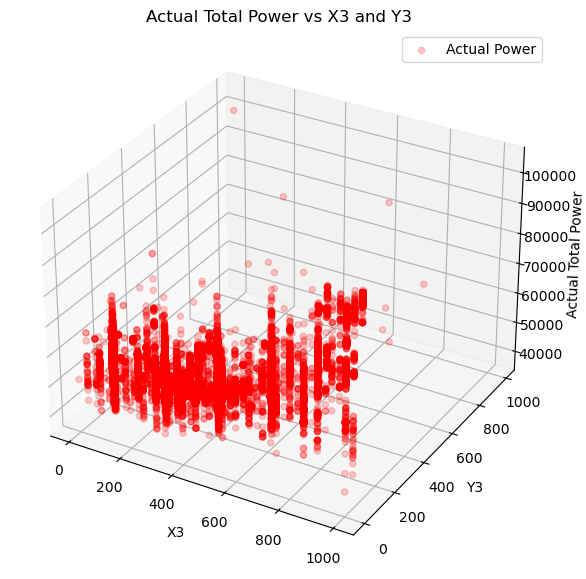

In [ ]:
tree_d_scatter(per, 'X3', 'Y3', 'Power3')

# Scratchbook

non scaled target

In [ ]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Do NOT scale y
y = per['Total_Power'].values  # Keep y in original units


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R-squared:", r2)


non-scaled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(per[features], per[target], test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R-squared:", svr.score(X_test, y_test))

In [ ]:
per.head()